# 크롤링 관련 함수

In [1]:
!pip install selenium
!pip install bs4
!pip install tqdm
!pip install lxml
!pip install webdriver_manager

  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import random
import time
import re
from webdriver_manager.chrome import ChromeDriverManager
press_type = ['조선일보', '중앙일보', '동아일보', '경향신문', '한겨레', 'KBS', 'MBC', 'SBS'] # ['조선일보', '중앙일보', '동아일보', '경향신문', '한겨레', 'KBS', 'MBC', 'SBS']
save_path = './data/'
base_path = './url/'

In [3]:
import os
print(os.getcwd()) #주피터노트북 파일이 있는 곳

C:\Users\user\Downloads


In [4]:
def get_url(path, press_type):
    df = pd.read_excel(path, sheet_name = 'sheet')
#     df = pd.read_csv(path, encoding='utf-8')
    url = df[df['언론사'] == press_type]['URL'].to_list()
    return url

def chosun_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
    title = bs.find('h1', class_='article-header__headline | font--secondary text--black').getText()
    body = bs.find('section', class_='article-body').getText()
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body

def joongang_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
    title = bs.find('h1', class_='headline').getText().replace('\n', "")
    body = bs.find('div', class_='article_body fs3').findAll('p')
    body_text = ""
    for i in body:
        body_text += i.getText()
        body_text = re.sub("  ", "", body_text)
        body_text = body_text.replace('\n', "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body_text

def donga_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
#     title = bs.find('head_group', class_='title').getText()
    title = bs.find_all('h1')[1].getText() #h1이 여러개: 제목은 h1 중 2번째
    body = bs.find('section', class_='news_view').getText()# {"itemprop": "articleBody"})
#     body_text = ""
#     for i in body:
#         body_text += i.getText()
#     body_text = body_text.replace('\n', '')
#     body_text = body_text.rstrip('Copyright ⓒ 동아일보 & donga.com')
    if '\n' in str(body):
        body = body.replace("\n", "")
    if '\r' in str(body):
        body = body.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body

def hangr_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
    title = bs.find('h3', class_='ArticleDetailView_title__9kRU_').getText()
    body = bs.find_all('p', class_='text')
    body_text = ""
    for i in body:
        body_text += str(i.getText())
    if '\n' in str(body_text):
        body_text = body_text.replace("\n", "")
    if '\r' in str(body_text):
        body_text = body_text.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body_text

def gyunghyang_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 5))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
    title = bs.find('h1', class_='headline').getText()
    body = bs.find_all('p', class_='content_text') #한겨레와 동일: 한개씩
    body_text = ""
    for i in body:
        body_text += i.getText()
    if '\n' in str(body_text):
        body_text = body_text.replace("\n", "")
    if '\r' in str(body_text):
        body_text = body_text.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 5))
    return title + ' ' + body_text

def kbs_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
#     print(bs.find('h4', class_='headline-title'),bs.find('p', class_='text'))
    title = bs.find('h4', class_='headline-title').getText()
    body = bs.find_all('p', class_='text')
    body_text = ""
    for i in body:
        body_text += i.getText()
    if '\n' in str(body_text):
        body_text = body_text.replace("\n", "")
    if '\r' in str(body_text):
        body_text = body_text.replace("\r", "")
#     for i in body.findAll('center'):
#         i.decompose()
#     body = body.getText()
    if '\n' in str(body):
        body = body.replace("\n", "")
    if '\r' in str(body):
        body = body.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body_text

def sbs_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
#     print( bs.find('h1', id='article_main_tit'), bs.find('div', class_='text_area') )
    title = bs.find('h1', class_='article_main_tit').getText()
    body = bs.find('div', class_='text_area').getText() #모든 글자가 하나의 계층에 담겨있기 때문에 find_all X
    if '\n' in str(body):
        body = body.replace("\n", "")
    if '\r' in str(body):
        body = body.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body

def mbc_crawling(url):
    current_handle = driver.current_window_handle
    driver.get(url)
    tabs = driver.window_handles
    if len(tabs) != 1:
        for handle in tabs:
            if handle != current_handle:
                driver.switch_to.window(handle)
                driver.implicitly_wait(10)
                driver.close()
    driver.switch_to.window(current_handle)
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    req = driver.page_source
    bs = BeautifulSoup(req, 'lxml')
    title = bs.find('h2', class_='art_title').getText()
    body = bs.find('div', class_='news_txt').getText() #앵커/리포트 나누지 않고 하기
    if '\n' in str(body):
        body = body.replace("\n", "")
    if '\r' in str(body):
        body = body.replace("\r", "")
    driver.implicitly_wait(10)
    time.sleep(random.randrange(1, 3))
    return title + ' ' + body

def save(save_path, data):
    with open(save_path, 'w', encoding='UTF-8') as f:
        cnt = 1
        for i in data:
            f.write(" " + i + '\n') #str(cnt) + :생략
            cnt += 1


In [5]:
# press_type = ['조선일보', '중앙일보', '동아일보', '경향신문', '한겨레', 'KBS', 'MBC', 'SBS']
# methods: chosun_crawling, joongang_crawling, donga_crawling, hangr_crawling,
#gyunghyang_crawling, kbs_crawling, sbs_crawling, mbc_crawling
def run(path,keyword, press):
    start_time = time.time()
    text_list = []
    url = get_url(path, press_type=press)
    cnt = 0
#     print(url)
    for i in tqdm(url):
#     for i in tqdm(url):
        try:
            if press == '조선일보':
                text_list.append(chosun_crawling(i)) # Changing crawling function
            elif press == '중앙일보':
                text_list.append(joongang_crawling(i)) # Changing crawling function
            elif press == '동아일보':
                text_list.append(donga_crawling(i)) # Changing crawling function
            elif press == '경향신문':
                text_list.append(gyunghyang_crawling(i)) # Changing crawling function
            elif press == '한겨레':
                text_list.append(hangr_crawling(i)) # Changing crawling function
            elif press == 'KBS':
                text_list.append(kbs_crawling(i)) # Changing crawling function
            elif press == 'MBC':
                text_list.append(mbc_crawling(i)) # Changing crawling function
            elif press == 'SBS':
                text_list.append(sbs_crawling(i)) # Changing crawling function
        except Exception as e:
            print("Error " + press + " in Index "+str(cnt), e)
            cnt+=1
            pass
        cnt += 1
    s_path = save_path + press +'_' + keyword + '.txt'
    save(s_path, text_list)
    running_time = (time.time() - start_time) / 60
    print("running_time: %.2f minutes" % running_time)
    time.sleep(10)

# 텍스트 마이닝, 워드클라우드 관련 함수

In [8]:
!pip install konlpy
!pip install wordcloud

In [23]:
def text_to_wordcloud(file_name):
    import konlpy
    from konlpy.corpus import kolaw
    from konlpy.tag import Komoran, Okt, Kkma, Hannanum
    from matplotlib import font_manager, rc
    import matplotlib.pyplot as plt
    from nltk import Text
    from wordcloud import WordCloud

    kolaw.fileids()

    import os
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        c = file.read()
    #print(c[:40])

    # 형태소 분석기
    hannanum = Hannanum()
    okt = Okt()

    #print("한나눔 : ", hannanum.nouns(c[:40]))
    #print("오픈 소스 한국어 분석기 : ", okt.nouns(c[:40]))

    # 품사 파악
    #print("한나눔 : ", hannanum.pos(c[:40]))
    #print("오픈 소스 한국어 분석기 : ", okt.pos(c[:40]))
    #print(okt.tagset)

    ## 윈도우즈 - 한글 폰트 설정 - 맑은 
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
    # 단어 빈도
    kolaw = Text(okt.nouns(c), name="kolaw")
    #kolaw.plot(30)
    #plt.show()

    ## 윈도우즈 폰트 path 
    path = 'c:/Windows/Fonts/malgun.ttf'

    # 워드 클라우드
    wc = WordCloud(width = 1000, height = 600,
               background_color="white", font_path = path) 
    plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
    plt.axis("off")
    plt.show()

# 1. 주제 선정이유
**워드클라우드를 통해 주요 키워드를 파악, 검색하여 주제를 좁혀나감.**

- 신문사: 조선일보, 중앙일보, 동아일보, 경향신문, 한겨레
- 검색어: '교통약자', '장애인 교통수단'

## 1-1) 검색어: '교통약자'

### Step 1. 신문사별 텍스트 수집

In [6]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome()
driver.implicitly_wait(5)
start_time = time.time()

keyword = '교통약자'
path = base_path + 'NewsResult_교통약자.xlsx'
for press in ['조선일보', '중앙일보', '동아일보', '경향신문', '한겨레']:
    # press = '조선일보'
    run(path, keyword, press)
driver.quit()

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 2/2 [00:25<00:00, 12.92s/it]


running_time: 0.48 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 10/10 [01:29<00:00,  8.91s/it]


running_time: 1.49 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 7/7 [01:14<00:00, 10.66s/it]


running_time: 1.25 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 14/14 [05:51<00:00, 25.08s/it]


running_time: 5.86 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 13/13 [01:51<00:00,  8.54s/it]


running_time: 1.85 minutes


In [7]:
# 키워드별 파일 합치기
selected_files = [
    'data/조선일보_교통약자.txt',
    'data/중앙일보_교통약자.txt',
    'data/동아일보_교통약자.txt',
    'data/경향신문_교통약자.txt',
    'data/한겨레_교통약자.txt'
]

output_file = 'combined_교통약자.txt'

combined_content = ""
for file_path in selected_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        combined_content += file.read() + "\n"

with open(output_file, 'w', encoding='utf-8') as output:
    output.write(combined_content)

print(f"Combined {len(selected_files)} files into {output_file}")

Combined 5 files into combined_교통약자.txt


### Step 2. 워드클라우드

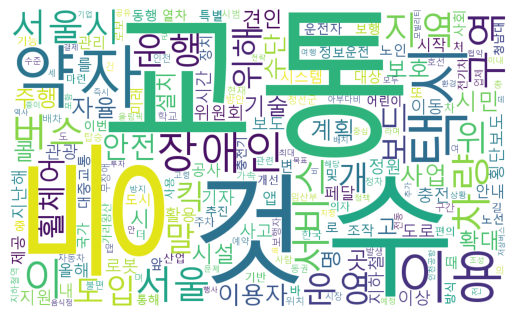

In [24]:
text_to_wordcloud('combined_교통약자.txt')

교통, 택시, 장애인 등이 주요 키워드  
**=> 장애인 교통수단 검색**

## 1-2) 검색어: '장애인 교통수단'

### Step 1. 신문사별 텍스트 수집

In [32]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(10)  # 대기시간 늘림
start_time = time.time()

keyword = '장애인 교통수단'
path = base_path + 'NewsResult_장애인 교통수단.xlsx'
for press in ['조선일보', '중앙일보', '동아일보', '경향신문', '한겨레']:
    # press = '조선일보'
    run(path, keyword, press)
driver.quit()

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
0it [00:00, ?it/s]


running_time: 0.00 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 1/1 [00:13<00:00, 13.19s/it]


running_time: 0.22 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 3/3 [00:33<00:00, 11.09s/it]


running_time: 0.56 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 11/11 [04:26<00:00, 24.27s/it]


running_time: 4.45 minutes


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|██████████| 3/3 [00:33<00:00, 11.33s/it]


running_time: 0.57 minutes


In [33]:
# 키워드별 파일 합치기
selected_files = [
    'data/조선일보_장애인 교통수단.txt',
    'data/중앙일보_장애인 교통수단.txt',
    'data/동아일보_장애인 교통수단.txt',
    'data/경향신문_장애인 교통수단.txt',
    'data/한겨레_장애인 교통수단.txt'
]

output_file = 'combined_장애인 교통수단.txt'

combined_content = ""
for file_path in selected_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        combined_content += file.read() + "\n"

with open(output_file, 'w', encoding='utf-8') as output:
    output.write(combined_content)

print(f"Combined {len(selected_files)} files into {output_file}")

Combined 5 files into combined_장애인 교통수단.txt


### Step 2. 워드클라우드

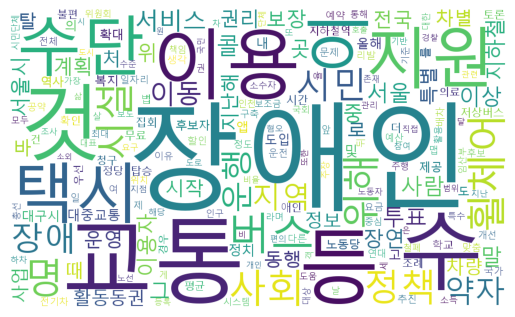

In [34]:
text_to_wordcloud('combined_장애인 교통수단.txt')

택시, 운행, 콜 등이 주요 키워드  
**=> 장애인 콜택시로 주제 선정**